In [793]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler ## standrard scalig 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [72]:
mobile=pd.read_csv('Mobile.csv')

In [56]:
mobile
mobile.tail()

,Products_link,Products_Model,Products_details,Price_regular,Price_offers,Currency,Known_price
2522,https://www.device-specs.io/categories/smartph...,Apple iPhone 12,2020 - A14 Bionic Chip - 6 cores - 6.1 inch - ...,731.00,,NaN,3
2523,https://www.device-specs.io/categories/smartph...,Samsung Galaxy A53,2022 - Samsung Exynos 1280 - 8 cores - 6.5 inc...,417.45,,NaN,4
2524,https://www.device-specs.io/categories/smartph...,Samsung Galaxy A53,2022 - Samsung Exynos 1280 - 8 cores - 6.5 inc...,377.41,,NaN,3
2525,https://www.device-specs.io/categories/smartph...,Samsung Galaxy A52S,Qualcomm Snapdragon - 8 cores - 6.5 inch - 128...,364.26,,NaN,1
2526,https://www.device-specs.io/categories/smartph...,Samsung Galaxy Xcover 5,2021 - Samsung Exynos 850 - 8 cores - 5.3 inch...,271.00,263.99,EUR,3


In [57]:
mobile.shape

(2527, 7)

In [58]:
mobile['Products_link'].head()

0    https://www.device-specs.io/categories/smartph...
1    https://www.device-specs.io/categories/smartph...
2    https://www.device-specs.io/categories/smartph...
3    https://www.device-specs.io/categories/smartph...
4    https://www.device-specs.io/categories/smartph...
Name: Products_link, dtype: object

In [59]:
def data_abstract(txt1): 
    import numpy as np
    try:
        a1 = txt1['cpu']['type']
    except KeyError:
        a1=np.nan
    try:
        a2 = txt1['camera']['camera_back__mp']
    except KeyError:
        a2=np.nan
    try:
        a3 = txt1['camera']['camera_front__mp']
    except KeyError:
        a3=np.nan
    try:
        a4 = txt1['battery']['capacity__mAh']
    except KeyError:
        a4=np.nan
    try:
        a5 = txt1['display']['type']
    except KeyError:
        a5=np.nan
    try:
        a6 = txt1['display']['size__inch']
    except KeyError:
        a6=np.nan
    try:
        a7 = txt1['display']['resolution__pixels'].split('x')[0]
    except KeyError:
        a7=np.nan
    try:
        a8 = txt1['display']['resolution__pixels'].split('x')[1]
    except KeyError:
        a8=np.nan
    try:
        a9 = txt1['general']['brand']
    except KeyError:
        a9=np.nan
    try:
        a11 = txt1['software']['os']
    except KeyError:
        a11=np.nan
    try:
        a12 = txt1['measurements']['width__mm']
    except KeyError:
        a12=np.nan
    try:
        a13 = txt1['measurements']['height__mm']
    except KeyError:
        a13=np.nan
    try:
        a14 = txt1['measurements']['length__mm']
    except KeyError:
        a14=np.nan
    try:
        a10 = txt1['storage']['capacity__gb']
    except KeyError:
        a10=np.nan
    try:
        a15 = txt1['cpu']['number_of_cores']
    except KeyError:
        a15=np.nan
    try:
        a16 = txt1['ports_interfaces']['type_of_connector']
    except KeyError:
        a16=np.nan
    
    data=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
    return data

In [60]:
import ast
import re
from bs4 import BeautifulSoup
import requests
import pandas as pd
new=[]
failed=[]
for i in range(mobile['Products_link'].size):
    try:
        html_text=requests.get(mobile['Products_link'][i]).text
        soup = BeautifulSoup(html_text,'lxml')
        code=soup.find_all('code',class_='language-json')
        code=str(code)
        pattern = re.compile("<.*?>")
        txt=pattern.sub("", code)
        pattern = re.compile("[\n ]")
        txt=pattern.sub("", txt)
        pattern = re.compile("true")
        txt=pattern.sub("True", txt)
        pattern = re.compile("false")
        txt=pattern.sub("False", txt)
        txt1=ast.literal_eval(txt)
        txt1=txt1[0]
        g=data_abstract(txt1)
        g.append(mobile['Price_regular'][i])
        g.append(mobile['Currency'][i])
        
        a=re.findall(r"\b\d{4}\b",mobile['Products_details'][i]) 
        if len(a)!=0:
            year=a[0].split()[0]
        else:
            year=np.nan
        #print(year)
        g.append(year)
        
        a=re.findall(r'\d{1,2} cores',mobile['Products_details'][i]) 
        if len(a)!=0:
            cores=a[0].split()[0]
        else:
            cores=np.nan
        #print(cores)
        g.append(cores)
        
        
        new.append(g)
    except IndexError:
        failed.append(i)
        continue
columns = ['cpu_name','camera_back__mp', 'camera_front__mp',
           'battery','display_type','display_size',
           'display_resolution_row','display_resolution_col',
           'brand','storage','os','width','height','length','cpu_cores','connector','Price','Currency','Year','Cores']
df = pd.DataFrame(data=new, columns=columns)
df

,cpu_name,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,width,height,length,cpu_cores,connector,Price,Currency,Year,Cores
0,NaN,12.0,7.0,3174.0,SuperRetina,6.50,2560,1080,Apple,256.0,iOS10.0,NaN,NaN,NaN,6.0,AppleLightning,899.00,EUR,2018,6
1,NaN,13.0,8.0,5000.0,LCD,6.52,1600,720,OPPO,64.0,Android11,NaN,NaN,NaN,8.0,USB-C,179.38,EUR,2021,8
2,NaN,13.0,5.0,3020.0,LCD,5.71,720,1520,Huawei,16.0,Android9.0Pie,NaN,NaN,NaN,4.0,Micro-USB,144.00,NaN,2019,4
3,NaN,12.0,12.0,3500.0,OLED,6.50,2688,1242,Apple,256.0,iOS13,NaN,NaN,NaN,6.0,AppleLightning,536.00,NaN,NaN,6
4,NaN,12.0,12.0,3500.0,OLED,6.50,2688,1242,Apple,64.0,iOS13,NaN,NaN,NaN,6.0,AppleLightning,486.00,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,Apple,12.0,7.0,NaN,IPS,4.70,1334,750,APPLE,64.0,iOS13,67.3,138.4,7.3,NaN,Lightning,434.80,NaN,NaN,NaN
2157,MediaTek,50.0,16.0,5000.0,IPS-LCD,6.53,720,1640,Motorola,64.0,Android,75.0,164.0,8.5,8.0,USB-C,155.00,EUR,2022,8
2158,A14BionicChip,12.0,12.0,2775.0,Retina,6.10,2532,1170,Apple,64.0,iOS,71.5,146.7,7.4,6.0,AppleLightning,709.00,EUR,2020,6
2159,A14BionicChip,12.0,12.0,2775.0,Retina,6.10,2532,1170,Apple,64.0,iOS,71.5,146.7,7.4,6.0,AppleLightning,731.00,NaN,2020,6


In [64]:
df.to_csv('Mobile_data.csv', index=False)

In [66]:
ff=pd.read_csv('Mobile_data.csv')
ff.head()

,cpu_name,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,width,height,length,cpu_cores,connector,Price,Currency,Year,Cores
0,NaN,12.0,7.0,3174.0,SuperRetina,6.50,2560.0,1080.0,Apple,256.0,iOS10.0,NaN,NaN,NaN,6.0,AppleLightning,899.00,EUR,2018.0,6.0
1,NaN,13.0,8.0,5000.0,LCD,6.52,1600.0,720.0,OPPO,64.0,Android11,NaN,NaN,NaN,8.0,USB-C,179.38,EUR,2021.0,8.0
2,NaN,13.0,5.0,3020.0,LCD,5.71,720.0,1520.0,Huawei,16.0,Android9.0Pie,NaN,NaN,NaN,4.0,Micro-USB,144.00,NaN,2019.0,4.0
3,NaN,12.0,12.0,3500.0,OLED,6.50,2688.0,1242.0,Apple,256.0,iOS13,NaN,NaN,NaN,6.0,AppleLightning,536.00,NaN,NaN,6.0
4,NaN,12.0,12.0,3500.0,OLED,6.50,2688.0,1242.0,Apple,64.0,iOS13,NaN,NaN,NaN,6.0,AppleLightning,486.00,NaN,NaN,6.0


In [68]:
ff.dtypes

cpu_name                   object
camera_back__mp           float64
camera_front__mp          float64
battery                   float64
display_type               object
display_size              float64
display_resolution_row    float64
display_resolution_col    float64
brand                      object
storage                   float64
os                         object
width                     float64
height                    float64
length                    float64
cpu_cores                 float64
connector                  object
Price                     float64
Currency                   object
Year                      float64
Cores                     float64
dtype: object

In [67]:
ff.isnull().sum()

cpu_name                  1156
camera_back__mp             75
camera_front__mp            70
battery                    319
display_type               232
display_size                 3
display_resolution_row     156
display_resolution_col     156
brand                        0
storage                      7
os                          17
width                     1178
height                    1199
length                    1176
cpu_cores                  388
connector                  248
Price                       16
Currency                  1316
Year                       828
Cores                      390
dtype: int64

In [70]:
len(failed)

366

In [73]:
import ast
import re
from bs4 import BeautifulSoup
import requests
import pandas as pd
new1=[]
failed1=[]
for i in failed:
    try:
        html_text=requests.get(mobile['Products_link'][i]).text
        soup = BeautifulSoup(html_text,'lxml')
        code=soup.find_all('code',class_='language-json')
        code=str(code)
        pattern = re.compile("<.*?>")
        txt=pattern.sub("", code)
        pattern = re.compile("[\n ]")
        txt=pattern.sub("", txt)
        pattern = re.compile("true")
        txt=pattern.sub("True", txt)
        pattern = re.compile("false")
        txt=pattern.sub("False", txt)
        txt1=ast.literal_eval(txt)
        txt1=txt1[0]
        g=data_abstract(txt1)
        g.append(mobile['Price_regular'][i])
        g.append(mobile['Currency'][i])
        
        a=re.findall(r"\b\d{4}\b",mobile['Products_details'][i]) 
        if len(a)!=0:
            year=a[0].split()[0]
        else:
            year=np.nan
        #print(year)
        g.append(year)
        
        a=re.findall(r'\d{1,2} cores',mobile['Products_details'][i]) 
        if len(a)!=0:
            cores=a[0].split()[0]
        else:
            cores=np.nan
        #print(cores)
        g.append(cores)
        
        
        new1.append(g)
    except IndexError:
        failed1.append(i)
        continue
columns = ['cpu_name','camera_back__mp', 'camera_front__mp',
           'battery','display_type','display_size',
           'display_resolution_row','display_resolution_col',
           'brand','storage','os','width','height','length','cpu_cores','connector','Price','Currency','Year','Cores']
df1 = pd.DataFrame(data=new1, columns=columns)
df1

,cpu_name,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,width,height,length,cpu_cores,connector,Price,Currency,Year,Cores
0,NaN,20.0,8.0,3200.0,IPS-LCD,5.15,1920,1080,Honor,64,Android7.0,NaN,NaN,NaN,8.0,USB-C,199.00,EUR,NaN,8
1,NaN,40.0,32.0,4200.0,OLED,6.47,2340,1080,Huawei,128,Android9.0Pie,NaN,NaN,NaN,8.0,USB-C,361.24,NaN,2019,8
2,NaN,40.0,24.0,4000.0,Amoled,6.10,2240,1080,Huawei,128,Android8.1,NaN,NaN,NaN,4.0,USB-C,254.00,EUR,NaN,4
3,NaN,13.0,5.0,3000.0,IPS-LCD,5.70,1440,720,Huawei,16,Android8.0,NaN,NaN,NaN,4.0,Micro-USB,200.63,NaN,2018,4
4,NaN,8.0,5.0,3020.0,IPS-LCD,5.45,720,1480,Huawei,32,Android10,NaN,NaN,NaN,8.0,Micro-USB,133.99,NaN,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,A15Bionicchip,12.0,12.0,3095.0,OLED,6.10,2532,1170,Apple,128,iOS,71.5,146.7,7.7,6.0,AppleLightning,814.99,EUR,2021,6
200,QualcommSnapdragon,50.0,16.0,NaN,AMOLED,6.62,1080,2400,REALME,256,Android12,75.8,162.9,8.6,8.0,NaN,573.34,NaN,NaN,8
201,Apple,12.0,5.0,NaN,NaN,4.70,1334,750,APPLE,64,iOS11,67.1,138.3,7.1,NaN,"3,5mm",229.00,NaN,NaN,NaN
202,Apple,12.0,12.0,2775.0,Retina,6.10,2532,1170,Apple,128,iOS14,71.5,146.7,7.4,6.0,AppleLightning,999.00,EUR,2020,6


In [74]:
df1.to_csv('Mobile_data1.csv', index=False)

In [76]:
len(failed1)

162

In [77]:
import ast
import re
from bs4 import BeautifulSoup
import requests
import pandas as pd
new2=[]
failed2=[]
for i in failed1:
    try:
        html_text=requests.get(mobile['Products_link'][i]).text
        soup = BeautifulSoup(html_text,'lxml')
        code=soup.find_all('code',class_='language-json')
        code=str(code)
        pattern = re.compile("<.*?>")
        txt=pattern.sub("", code)
        pattern = re.compile("[\n ]")
        txt=pattern.sub("", txt)
        pattern = re.compile("true")
        txt=pattern.sub("True", txt)
        pattern = re.compile("false")
        txt=pattern.sub("False", txt)
        txt1=ast.literal_eval(txt)
        txt1=txt1[0]
        g=data_abstract(txt1)
        g.append(mobile['Price_regular'][i])
        g.append(mobile['Currency'][i])
        
        a=re.findall(r"\b\d{4}\b",mobile['Products_details'][i]) 
        if len(a)!=0:
            year=a[0].split()[0]
        else:
            year=np.nan
        #print(year)
        g.append(year)
        
        a=re.findall(r'\d{1,2} cores',mobile['Products_details'][i]) 
        if len(a)!=0:
            cores=a[0].split()[0]
        else:
            cores=np.nan
        #print(cores)
        g.append(cores)
        
        
        new2.append(g)
    except IndexError:
        failed2.append(i)
        continue
columns = ['cpu_name','camera_back__mp', 'camera_front__mp',
           'battery','display_type','display_size',
           'display_resolution_row','display_resolution_col',
           'brand','storage','os','width','height','length','cpu_cores','connector','Price','Currency','Year','Cores']
df2 = pd.DataFrame(data=new2, columns=columns)
df2

,cpu_name,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,width,height,length,cpu_cores,connector,Price,Currency,Year,Cores
0,8655G,NaN,10,4500,AMOLED,6.7,NaN,NaN,Samsung,128,Android10,NaN,NaN,NaN,NaN,NaN,1199.99,NaN,NaN,NaN
1,QualcommSnapdragon855,16.0,10,4380,AMOLED,7.3,NaN,NaN,Samsung,512,Android9.0Pie,62.74,160.78,17.02,NaN,USBTypeC,1781.99,USD,NaN,NaN


In [80]:
df2.to_csv('Mobile_data2.csv', index=False)

In [83]:
failed2

[862,
 937,
 954,
 1000,
 1069,
 1145,
 1150,
 1152,
 1158,
 1162,
 1164,
 1166,
 1167,
 1181,
 1200,
 1208,
 1214,
 1241,
 1254,
 1255,
 1258,
 1263,
 1265,
 1299,
 1313,
 1340,
 1341,
 1343,
 1344,
 1350,
 1359,
 1366,
 1383,
 1388,
 1409,
 1414,
 1416,
 1423,
 1425,
 1427,
 1436,
 1454,
 1464,
 1501,
 1506,
 1516,
 1542,
 1547,
 1589,
 1592,
 1653,
 1656,
 1661,
 1663,
 1707,
 1715,
 1750,
 1772,
 1780,
 1795,
 1811,
 1828,
 1843,
 1846,
 1876,
 1883,
 1884,
 1886,
 1896,
 1906,
 1910,
 1913,
 1924,
 1926,
 1933,
 1935,
 1946,
 1952,
 2008,
 2021,
 2032,
 2039,
 2045,
 2049,
 2054,
 2060,
 2061,
 2062,
 2067,
 2068,
 2069,
 2087,
 2103,
 2115,
 2117,
 2122,
 2126,
 2138,
 2164,
 2177,
 2182,
 2194,
 2198,
 2200,
 2219,
 2227,
 2239,
 2262,
 2271,
 2278,
 2287,
 2288,
 2289,
 2290,
 2298,
 2299,
 2310,
 2314,
 2315,
 2316,
 2317,
 2319,
 2326,
 2327,
 2331,
 2338,
 2339,
 2343,
 2357,
 2359,
 2365,
 2367,
 2388,
 2394,
 2419,
 2425,
 2436,
 2441,
 2442,
 2443,
 2445,
 2452,
 2453,
 2

In [85]:
# Open a file for writing
with open('my_file.txt', 'w') as f:
    # Write each element of the list to a new line in the file
    for element in failed2:
        f.write(str(element) + '\n')

In [146]:
df=pd.read_csv('Mobile_data.csv')
df1=pd.read_csv('Mobile_data1.csv')
df2=pd.read_csv('Mobile_data2.csv')

concatenated_df = pd.concat([df, df1, df2])
concatenated_df.reset_index(inplace=True)
concatenated_df.drop(columns=['index'],inplace=True)

In [147]:
concatenated_df

,cpu_name,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,width,height,length,cpu_cores,connector,Price,Currency,Year,Cores
0,NaN,12.0,7.0,3174.0,SuperRetina,6.50,2560.0,1080.0,Apple,256.0,iOS10.0,NaN,NaN,NaN,6.0,AppleLightning,899.00,EUR,2018.0,6.0
1,NaN,13.0,8.0,5000.0,LCD,6.52,1600.0,720.0,OPPO,64.0,Android11,NaN,NaN,NaN,8.0,USB-C,179.38,EUR,2021.0,8.0
2,NaN,13.0,5.0,3020.0,LCD,5.71,720.0,1520.0,Huawei,16.0,Android9.0Pie,NaN,NaN,NaN,4.0,Micro-USB,144.00,NaN,2019.0,4.0
3,NaN,12.0,12.0,3500.0,OLED,6.50,2688.0,1242.0,Apple,256.0,iOS13,NaN,NaN,NaN,6.0,AppleLightning,536.00,NaN,NaN,6.0
4,NaN,12.0,12.0,3500.0,OLED,6.50,2688.0,1242.0,Apple,64.0,iOS13,NaN,NaN,NaN,6.0,AppleLightning,486.00,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,Apple,12.0,5.0,NaN,NaN,4.70,1334.0,750.0,APPLE,64.0,iOS11,67.10,138.30,7.10,NaN,"3,5mm",229.00,NaN,NaN,NaN
2363,Apple,12.0,12.0,2775.0,Retina,6.10,2532.0,1170.0,Apple,128.0,iOS14,71.50,146.70,7.40,6.0,AppleLightning,999.00,EUR,2020.0,6.0
2364,QualcommSnapdragon8+Gen1,50.0,4.0,4400.0,Amoled,7.60,2176.0,1812.0,Samsung,512.0,Android,130.10,155.10,6.30,8.0,USB-C,1479.00,EUR,2022.0,8.0
2365,8655G,NaN,10.0,4500.0,AMOLED,6.70,NaN,NaN,Samsung,128.0,Android10,NaN,NaN,NaN,NaN,NaN,1199.99,NaN,NaN,NaN


In [148]:
concatenated_df.dtypes

cpu_name                   object
camera_back__mp           float64
camera_front__mp          float64
battery                   float64
display_type               object
display_size              float64
display_resolution_row    float64
display_resolution_col    float64
brand                      object
storage                   float64
os                         object
width                     float64
height                    float64
length                    float64
cpu_cores                 float64
connector                  object
Price                     float64
Currency                   object
Year                      float64
Cores                     float64
dtype: object

In [149]:
type(concatenated_df['Year'][1])

numpy.float64

In [150]:
int(concatenated_df['Year'][0])

2018

In [151]:
import warnings
warnings.filterwarnings("ignore")

for i in range(concatenated_df['display_resolution_row'].size):
    try:
        concatenated_df['display_resolution_row'][i]=int(concatenated_df['display_resolution_row'][i])
    except:
        concatenated_df['display_resolution_row'][i]

        
for i in range(concatenated_df['display_resolution_col'].size):
    try:
        concatenated_df['display_resolution_col'][i]=int(concatenated_df['display_resolution_col'][i])
    except:
        concatenated_df['display_resolution_col'][i]        

        

for i in range(concatenated_df['Year'].size):
    try:
        concatenated_df['Year'][i]=int(concatenated_df['Year'][i])
    except:
        concatenated_df['Year'][i]
        
for i in range(concatenated_df['Cores'].size):
    try:
        concatenated_df['Cores'][i]=int(concatenated_df['Cores'][i])
    except:
        concatenated_df['Cores'][i]

In [336]:
concatenated_df

,cpu_name,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,width,height,length,cpu_cores,connector,Price,Currency,Year,Cores
0,NaN,12.0,7.0,3174.0,SuperRetina,6.50,2560.0,1080.0,Apple,256.0,iOS10.0,NaN,NaN,NaN,6.0,AppleLightning,899.00,EUR,2018.0,6.0
1,NaN,13.0,8.0,5000.0,LCD,6.52,1600.0,720.0,OPPO,64.0,Android11,NaN,NaN,NaN,8.0,USB-C,179.38,EUR,2021.0,8.0
2,NaN,13.0,5.0,3020.0,LCD,5.71,720.0,1520.0,Huawei,16.0,Android9.0Pie,NaN,NaN,NaN,4.0,Micro-USB,144.00,NaN,2019.0,4.0
3,NaN,12.0,12.0,3500.0,OLED,6.50,2688.0,1242.0,Apple,256.0,iOS13,NaN,NaN,NaN,6.0,AppleLightning,536.00,NaN,NaN,6.0
4,NaN,12.0,12.0,3500.0,OLED,6.50,2688.0,1242.0,Apple,64.0,iOS13,NaN,NaN,NaN,6.0,AppleLightning,486.00,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,Apple,12.0,5.0,NaN,NaN,4.70,1334.0,750.0,APPLE,64.0,iOS11,67.10,138.30,7.10,NaN,"3,5mm",229.00,NaN,NaN,NaN
2363,Apple,12.0,12.0,2775.0,Retina,6.10,2532.0,1170.0,Apple,128.0,iOS14,71.50,146.70,7.40,6.0,AppleLightning,999.00,EUR,2020.0,6.0
2364,QualcommSnapdragon8+Gen1,50.0,4.0,4400.0,Amoled,7.60,2176.0,1812.0,Samsung,512.0,Android,130.10,155.10,6.30,8.0,USB-C,1479.00,EUR,2022.0,8.0
2365,8655G,NaN,10.0,4500.0,AMOLED,6.70,NaN,NaN,Samsung,128.0,Android10,NaN,NaN,NaN,NaN,NaN,1199.99,NaN,NaN,NaN


In [492]:
concatenated_df['Year'].unique()

array([2018., 2021., 2019.,   nan, 2020., 2022., 2023., 2016., 2017.,
       2015., 1313., 1311., 2014., 1310., 1308., 1307., 1050., 1280.,
       6375., 1309., 2011., 1318., 1303., 2288., 2286., 2287., 7305.])

In [647]:
phone=concatenated_df.copy()

In [648]:
phone.isna().sum()

cpu_name                  1297
camera_back__mp             79
camera_front__mp            77
battery                    345
display_type               248
display_size                 3
display_resolution_row     171
display_resolution_col     171
brand                        0
storage                      7
os                          19
width                     1326
height                    1346
length                    1322
cpu_cores                  427
connector                  268
Price                       21
Currency                  1441
Year                       909
Cores                      429
dtype: int64

In [649]:
phone.drop(columns=['width','height','length','Cores','Currency','Year'],inplace=True)

In [650]:
phone.isnull().sum()

cpu_name                  1297
camera_back__mp             79
camera_front__mp            77
battery                    345
display_type               248
display_size                 3
display_resolution_row     171
display_resolution_col     171
brand                        0
storage                      7
os                          19
cpu_cores                  427
connector                  268
Price                       21
dtype: int64

In [651]:
phone.shape

(2367, 14)

In [652]:
phone.head()

,cpu_name,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,cpu_cores,connector,Price
0,NaN,12.0,7.0,3174.0,SuperRetina,6.50,2560.0,1080.0,Apple,256.0,iOS10.0,6.0,AppleLightning,899.00
1,NaN,13.0,8.0,5000.0,LCD,6.52,1600.0,720.0,OPPO,64.0,Android11,8.0,USB-C,179.38
2,NaN,13.0,5.0,3020.0,LCD,5.71,720.0,1520.0,Huawei,16.0,Android9.0Pie,4.0,Micro-USB,144.00
3,NaN,12.0,12.0,3500.0,OLED,6.50,2688.0,1242.0,Apple,256.0,iOS13,6.0,AppleLightning,536.00
4,NaN,12.0,12.0,3500.0,OLED,6.50,2688.0,1242.0,Apple,64.0,iOS13,6.0,AppleLightning,486.00


In [653]:
phone['brand']=phone['brand'].apply(lambda x:x.lower())

In [654]:
phone['brand'].unique()

array(['apple', 'oppo', 'huawei', 'samsung', 'xiaomi', 'motorola',
       'google', 'oneplus', 'realme', 'emporia', 'vivo', 'crosscall',
       'ulefone', 'blackview', 'simplemobile', 'iphone', 'sony',
       'blabloo', 'lg', 'poco', 'nokia', 'doro', 'unihertz', 'telekom',
       'gigaset', 'oukitel', 'honor', 'doogee', 'tcl', 'tim',
       'blackberry', 'myphone', 'asus', 'cat', 'merkloos', 'lenovo',
       'microsoft', 'fairphone', 'alcatel', 'syco', 'jbl', 'redmi',
       'hammer', 'panasonic', 'boostmobile', 'tracfone', 'blaupunkt',
       'senifone', 'vertu', 'thymos', 'fysic', 'wileyfox',
       'i.safe-mobile', 'generalmobile', 'beafon', 'hama', 'umidigi',
       'simpc', 'cyrus', 'yealink', 'nvt', 'olympia', 'ruggear',
       'googlenest', 'ordissimo', 'caterpillar', 'zte', 'cubot'],
      dtype=object)

In [655]:
phone['display_type'].unique()

array(['SuperRetina', 'LCD', 'OLED', 'DynamicAmoled', 'Amoled', 'Retina',
       nan, 'SuperRetinaXDR-display', 'IPS-LCD', 'TFT', 'IPS',
       'SuperRetinaXDRdisplay', 'AMOLED', 'TFT-LCD', 'SuperAmoled',
       'HDSuperAmoled', 'SuperAMOLED', 'DynamicAMOLED2X', 'RetinaDisplay',
       'SuperAmoledPlus', 'SuperAMOLEDPlus', 'FHDHDR', 'LTPS', 'LED',
       'Other', 'Super-LCD', 'LTPS-LCD', 'RetinaHDdisplay', 'Geenscherm',
       'FluidAMOLED', 'SAMOLED', 'PLS', 'SuperAMOLEDHD'], dtype=object)

In [656]:
phone['display_type'].replace({'Amoled':'AMOLED','SAMOLED':'SuperAMOLED','SuperRetinaXDR-display':'SuperRetinaXDRdisplay','RetinaDisplay':'Retina'},inplace=True)

In [657]:
phone['os'].unique()

array(['iOS10.0', 'Android11', 'Android9.0Pie', 'iOS13', 'Android12',
       'iOS14', 'Anders', 'Android', 'iOS15', 'Android13', 'AppleiOS14',
       'Android10', 'iOS12', 'AppleiOS16', 'Android5.0', 'Android7.0',
       'Android8.1', 'Android7.1', 'Android5.1', 'AndroidOne', 'WearOS',
       'AppleiOS15', 'AppleiOS', 'Android8.0', 'AppleiOS13', 'Android6.0',
       'Android4.7', nan, 'Android9.0', 'Android8.1Go', 'iOS', 'iOS16',
       'Android11Go', 'KaiOS', 'AppleiOS12', 'Android10Go', 'iOS8.0',
       'iOS11', 'iOS7.0', 'Windows8.1', 'Windows10', 'Android4.4',
       'OxygenOS', 'Android10.0', 'MIUI12', 'Android10Goedition',
       'Android8.1Goedition', 'LinuxUbuntu', 'Android8.1Oreo'],
      dtype=object)

In [658]:
phone['os'].replace({'AppleiOS14':'iOS14','AppleiOS16':'iOS16','AppleiOS15':'iOS15','AppleiOS13':'iOS13','AppleiOS12':'iOS12','AppleiOS':
                    'iOS'},inplace=True)

In [659]:
phone['connector'].unique()

array(['AppleLightning', 'USB-C', 'Micro-USB', nan, 'USBTypeC',
       'Lightning', 'USB-C|Merkspecifiek', 'USB2.0', '3.5mmjack', 'FC',
       'Mini-USB', 'Merkspecifiek', 'USB', 'Wireless', 'Apple30-pin',
       'Wifi', '3.5mmjack|USB-C', 'Merkspecifiek|USB-C', '3,5mm',
       'USBType-C'], dtype=object)

In [660]:
phone['connector'].replace({'USBTypeC':'USB-C','AppleLightning':'Lightning','USB-C|Merkspecifiek':'USB-C','3.5mmjack':'3.5mm','3.5mmjack|USB-C':'USB-C','Merkspecifiek|USB-C':
                    'USB-C','USBType-C':'USB-C'},inplace=True)

In [661]:
phone['connector'].unique()

array(['Lightning', 'USB-C', 'Micro-USB', nan, 'USB2.0', '3.5mm', 'FC',
       'Mini-USB', 'Merkspecifiek', 'USB', 'Wireless', 'Apple30-pin',
       'Wifi', '3,5mm'], dtype=object)

In [662]:
a=phone.loc[phone['camera_back__mp'].isna()]['camera_front__mp'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['camera_front__mp']==i)][['camera_back__mp']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['camera_front__mp']==i)&(phone['camera_back__mp'].isna()),'camera_back__mp']=d

In [663]:
a=phone.loc[phone['camera_front__mp'].isna()]['camera_back__mp'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
for i in b:
    try:
        d=phone.loc[(phone['camera_back__mp']==i)][['camera_front__mp']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['camera_back__mp']==i)&(phone['camera_front__mp'].isna()),'camera_front__mp']=d

In [664]:
a=phone.loc[phone['battery'].isna()]['Price'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['Price']==i)][['battery']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['Price']==i)&(phone['battery'].isna()),'battery']=d

In [665]:
a=phone.loc[phone['display_resolution_row'].isna()]['display_resolution_col'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['display_resolution_col']==i)][['display_resolution_row']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['display_resolution_col']==i)&(phone['display_resolution_row'].isna()),'display_resolution_row']=d

In [666]:
a=phone.loc[phone['display_resolution_col'].isna()]['display_resolution_row'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['display_resolution_row']==i)][['display_resolution_col']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['display_resolution_row']==i)&(phone['display_resolution_col'].isna()),'display_resolution_col']=d

In [667]:
a=phone.loc[phone['display_type'].isna()]['display_size'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['display_size']==i)][['display_type']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['display_size']==i)&(phone['display_type'].isna()),'display_type']=d

In [668]:
a=phone.loc[phone['display_size'].isna()]['display_type'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['display_type']==i)][['display_size']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['display_type']==i)&(phone['display_size'].isna()),'display_size']=d

In [669]:
a=phone.loc[phone['storage'].isna()]['Price'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['Price']==i)][['storage']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['Price']==i)&(phone['storage'].isna()),'storage']=d

In [670]:
a=phone.loc[phone['Price'].isna()]['storage'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['storage']==i)][['Price']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['storage']==i)&(phone['Price'].isna()),'Price']=d

In [671]:
a=phone.loc[phone['cpu_cores'].isna()]['Price'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['Price']==i)][['cpu_cores']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['Price']==i)&(phone['cpu_cores'].isna()),'cpu_cores']=d

In [672]:
a=phone.loc[phone['os'].isna()]['brand'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['brand']==i)][['os']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['brand']==i)&(phone['os'].isna()),'os']=d

In [673]:
a=phone.loc[phone['connector'].isna()]['brand'].unique()
b=[]
for i in a:
    if i==i:
        b.append(i)
b
for i in b:
    try:
        d=phone.loc[(phone['brand']==i)][['connector']].value_counts().idxmax()[0]
    except:
        d=np.nan
    phone.loc[(phone['brand']==i)&(phone['connector'].isna()),'connector']=d

In [674]:
z=(phone['camera_back__mp'].isna())|(phone['camera_front__mp'].isna())|(phone['battery'].isna())|(phone['display_resolution_row'].isna())|(phone['display_resolution_col'].isna())|(phone['cpu_cores'].isna()|(phone['connector'].isna()))
phone=phone[~z]

In [675]:
phone.shape

(1829, 14)

In [676]:
phone.isna().sum()

cpu_name                  1261
camera_back__mp              0
camera_front__mp             0
battery                      0
display_type                 0
display_size                 0
display_resolution_row       0
display_resolution_col       0
brand                        0
storage                      0
os                           0
cpu_cores                    0
connector                    0
Price                        0
dtype: int64

In [677]:
phone.isna().sum()

cpu_name                  1261
camera_back__mp              0
camera_front__mp             0
battery                      0
display_type                 0
display_size                 0
display_resolution_row       0
display_resolution_col       0
brand                        0
storage                      0
os                           0
cpu_cores                    0
connector                    0
Price                        0
dtype: int64

In [678]:
phone.drop(columns='cpu_name',inplace=True)

In [679]:
phone.isna().sum()

camera_back__mp           0
camera_front__mp          0
battery                   0
display_type              0
display_size              0
display_resolution_row    0
display_resolution_col    0
brand                     0
storage                   0
os                        0
cpu_cores                 0
connector                 0
Price                     0
dtype: int64

In [680]:
phone.dtypes

camera_back__mp           float64
camera_front__mp          float64
battery                   float64
display_type               object
display_size              float64
display_resolution_row    float64
display_resolution_col    float64
brand                      object
storage                   float64
os                         object
cpu_cores                 float64
connector                  object
Price                     float64
dtype: object

In [681]:
phone['display_type'].unique()

array(['SuperRetina', 'LCD', 'OLED', 'DynamicAmoled', 'AMOLED', 'Retina',
       'SuperRetinaXDRdisplay', 'IPS-LCD', 'TFT', 'IPS', 'SuperAmoled',
       'HDSuperAmoled', 'SuperAMOLED', 'DynamicAMOLED2X',
       'SuperAmoledPlus', 'SuperAMOLEDPlus', 'FHDHDR', 'LTPS', 'LED',
       'LTPS-LCD', 'RetinaHDdisplay', 'Geenscherm', 'PLS'], dtype=object)

In [682]:
phone['display_type']=phone['display_type'].apply(lambda x:x.lower())

In [683]:
phone['display_type'].unique()

array(['superretina', 'lcd', 'oled', 'dynamicamoled', 'amoled', 'retina',
       'superretinaxdrdisplay', 'ips-lcd', 'tft', 'ips', 'superamoled',
       'hdsuperamoled', 'dynamicamoled2x', 'superamoledplus', 'fhdhdr',
       'ltps', 'led', 'ltps-lcd', 'retinahddisplay', 'geenscherm', 'pls'],
      dtype=object)

In [684]:
phone['os'].unique()

array(['iOS10.0', 'Android11', 'Android9.0Pie', 'iOS13', 'Android12',
       'iOS14', 'Anders', 'iOS15', 'Android', 'Android13', 'Android10',
       'iOS12', 'Android5.0', 'Android7.0', 'Android8.1', 'Android7.1',
       'Android5.1', 'AndroidOne', 'iOS', 'Android8.0', 'Android6.0',
       'Android4.7', 'Android9.0', 'Android8.1Go', 'iOS16', 'Android11Go',
       'Android10Go', 'iOS8.0', 'iOS11', 'iOS7.0', 'Windows8.1',
       'Windows10', 'Android4.4', 'Android10.0'], dtype=object)

In [685]:
phone['os']=phone['os'].apply(lambda x:x.lower())

In [686]:
phone['os'].unique()

array(['ios10.0', 'android11', 'android9.0pie', 'ios13', 'android12',
       'ios14', 'anders', 'ios15', 'android', 'android13', 'android10',
       'ios12', 'android5.0', 'android7.0', 'android8.1', 'android7.1',
       'android5.1', 'androidone', 'ios', 'android8.0', 'android6.0',
       'android4.7', 'android9.0', 'android8.1go', 'ios16', 'android11go',
       'android10go', 'ios8.0', 'ios11', 'ios7.0', 'windows8.1',
       'windows10', 'android4.4', 'android10.0'], dtype=object)

In [687]:
phone['display_type'].unique().size

21

In [690]:
a=phone.groupby("display_type")['Price'].mean().to_frame().sort_values(by='Price').reset_index()
a

,display_type,Price
0,tft,210.673529
1,lcd,232.122936
2,ips-lcd,245.800503
3,fhdhdr,250.592500
4,ips,268.917603
5,geenscherm,282.300000
6,led,342.773636
7,superamoled,348.857237
8,pls,399.000000
9,ltps,429.398000


In [698]:
a=phone.groupby("display_type")['Price'].mean().to_frame().sort_values(by='Price').reset_index()
a
for i in range(phone['display_type'].unique().size):
    phone.loc[phone['display_type']==a['display_type'][i],'display_type']=i+1

In [705]:
a=phone.groupby("os")['Price'].mean().to_frame().sort_values(by='Price').reset_index()
a

,os,Price
0,android11go,123.138333
1,ios7.0,125.000000
2,android4.7,128.400000
3,android4.4,149.475000
4,android6.0,193.662857
5,android9.0,195.983333
6,android5.1,198.047222
7,android10go,199.000000
8,androidone,199.877500
9,ios8.0,200.666667


In [706]:
a=phone.groupby("os")['Price'].mean().to_frame().sort_values(by='Price').reset_index()
a
for i in range(phone['os'].unique().size):
    phone.loc[phone['os']==a['os'][i],'os']=i+1

In [709]:
phone['os']=phone['os'].astype(int)

In [710]:
phone.head()

,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,cpu_cores,connector,Price
0,12.0,7.0,3174.0,15,6.50,2560.0,1080.0,apple,256.0,24,6.0,Lightning,899.00
1,13.0,8.0,5000.0,2,6.52,1600.0,720.0,oppo,64.0,27,8.0,USB-C,179.38
2,13.0,5.0,3020.0,2,5.71,720.0,1520.0,huawei,16.0,21,4.0,Micro-USB,144.00
3,12.0,12.0,3500.0,20,6.50,2688.0,1242.0,apple,256.0,29,6.0,Lightning,536.00
4,12.0,12.0,3500.0,20,6.50,2688.0,1242.0,apple,64.0,29,6.0,Lightning,486.00


In [711]:
a=phone.groupby("brand")['Price'].mean().to_frame().sort_values(by='Price').reset_index()
a
for i in range(phone['brand'].unique().size):
    phone.loc[phone['brand']==a['brand'][i],'brand']=i+1

In [712]:
a=phone.groupby("connector")['Price'].mean().to_frame().sort_values(by='Price').reset_index()
a
for i in range(phone['connector'].unique().size):
    phone.loc[phone['connector']==a['connector'][i],'connector']=i+1

In [713]:
phone.head()

,camera_back__mp,camera_front__mp,battery,display_type,display_size,display_resolution_row,display_resolution_col,brand,storage,os,cpu_cores,connector,Price
0,12.0,7.0,3174.0,15,6.50,2560.0,1080.0,53,256.0,24,6.0,12,899.00
1,13.0,8.0,5000.0,2,6.52,1600.0,720.0,37,64.0,27,8.0,9,179.38
2,13.0,5.0,3020.0,2,5.71,720.0,1520.0,27,16.0,21,4.0,4,144.00
3,12.0,12.0,3500.0,20,6.50,2688.0,1242.0,53,256.0,29,6.0,12,536.00
4,12.0,12.0,3500.0,20,6.50,2688.0,1242.0,53,64.0,29,6.0,12,486.00


In [715]:
phone['connector']=phone['connector'].astype(int)

In [716]:
phone.dtypes

camera_back__mp           float64
camera_front__mp          float64
battery                   float64
display_type                int32
display_size              float64
display_resolution_row    float64
display_resolution_col    float64
brand                      object
storage                   float64
os                          int32
cpu_cores                 float64
connector                   int32
Price                     float64
dtype: object

In [833]:
phone['brand']=phone['brand'].astype(int)

### LinearRegression

In [783]:
from sklearn.model_selection import train_test_split
X=phone.drop(columns=['Price']).values
y=phone['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [784]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [785]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() #initialise the required package
regressor.fit(X_train_scaled,y_train) #magic happens - best values of betas - training/learning happens here

LinearRegression()

In [786]:
y_pred=regressor.predict(X_test_scaled)
#y_pred

In [787]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.0891648459619987


### Decision Tree

In [834]:
from sklearn.model_selection import train_test_split
X=phone.drop(columns=['Price'])
y=phone['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [835]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) 

y_pred=dt.predict(X_test)
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.600158073126606


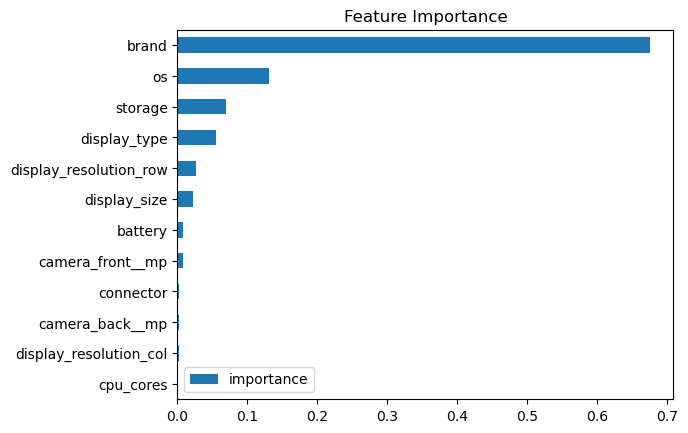

In [836]:
fi = pd.DataFrame(data=dt.feature_importances_,
             index=dt.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### KNN

In [837]:
from sklearn.model_selection import train_test_split
X=phone.drop(columns=['Price']).values
y=phone['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [838]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train) 

y_pred=knn.predict(X_test_scaled)
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8409476771181983


### XGBoost

In [839]:
from sklearn.model_selection import train_test_split
X=phone.drop(columns=['Price'])
y=phone['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [841]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_train,y_train) #train the model
    model.score(X_test, y_test) # scoring the model - r2 squared
    print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.6256832266958736  Cross-Val score :  0.5856938317409421
Learning rate :  0.02  Train score :  0.827048159196477  Cross-Val score :  0.7840800930134263
Learning rate :  0.03  Train score :  0.8616851452997121  Cross-Val score :  0.8047004050704614
Learning rate :  0.04  Train score :  0.8693764047727779  Cross-Val score :  0.8047987169617328
Learning rate :  0.05  Train score :  0.8723086706717091  Cross-Val score :  0.8028852189394555
Learning rate :  0.06  Train score :  0.8740304466167714  Cross-Val score :  0.8026442269771856
Learning rate :  0.07  Train score :  0.8757382481201121  Cross-Val score :  0.8027864890553014
Learning rate :  0.08  Train score :  0.8773963839919815  Cross-Val score :  0.8024990557498238
Learning rate :  0.09  Train score :  0.8775190918167212  Cross-Val score :  0.8040915458475842
Learning rate :  0.1  Train score :  0.8787080676746339  Cross-Val score :  0.8040136067442795
Learning rate :  0.11  Train score :  0.87

In [843]:
model = XGBRegressor(learning_rate = 0.13, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

0.8146891308842005

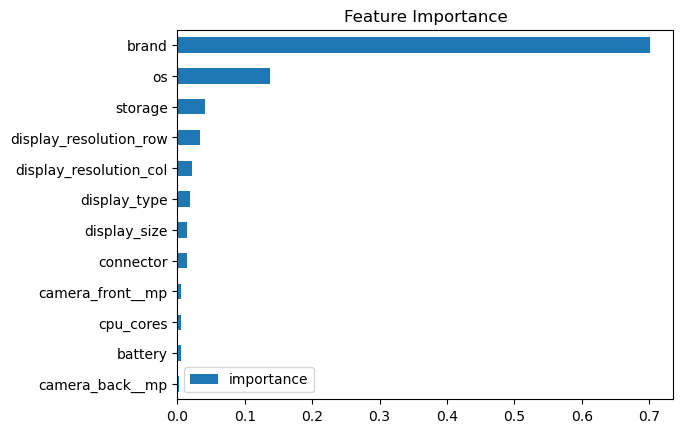

In [844]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### RandomForest

In [845]:
from sklearn.model_selection import train_test_split
X=phone.drop(columns=['Price'])
y=phone['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [846]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print(rf.score(X_test,y_test))
#metrics.r2_score(y_test,y_pred)

0.8120676879293018


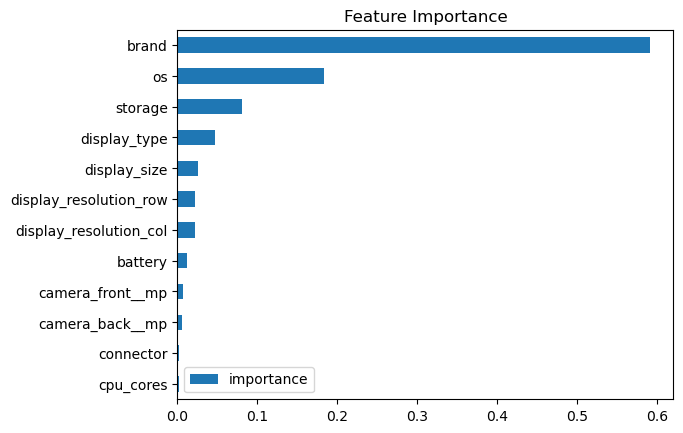

In [847]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### VotingRegressor

In [866]:
from sklearn.model_selection import train_test_split
X=phone.drop(columns=['Price'])
y=phone['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [867]:
from sklearn.ensemble import VotingRegressor # this is the function that ensembles my model
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score

model1 = tree.DecisionTreeRegressor(random_state=34,max_features=4)
model2 = tree.DecisionTreeRegressor(random_state=12,max_features=2)
model3 = tree.DecisionTreeRegressor(random_state=1,max_features=3)

model = VotingRegressor(estimators=[ ('dt1', model1),('dt2', model2),('dt3',model3)]) # it will stitich all the models together, voting = hard means max voting 

model.fit(X_train,y_train) # to train all of the models
y_pred = model.predict(X_test)

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7683203155513256


In [868]:
dt1_feature_importance = model.named_estimators_['dt1'].feature_importances_
dt2_feature_importance = model.named_estimators_['dt2'].feature_importances_
dt3_feature_importance = model.named_estimators_['dt3'].feature_importances_

In [869]:
# Calculate overall feature importance
feature_importance = (dt1_feature_importance + dt2_feature_importance + dt3_feature_importance) / 3

In [870]:
feature_importance

array([0.01447273, 0.02240881, 0.03847184, 0.12849108, 0.10522824,
       0.0207722 , 0.01793277, 0.50673359, 0.04753322, 0.09374258,
       0.00191712, 0.00229583])

In [871]:
j=['camera_back__mp', 'camera_front__mp', 'battery', 'display_type',
       'display_size', 'display_resolution_row', 'display_resolution_col',
       'brand', 'storage', 'os', 'cpu_cores', 'connector']

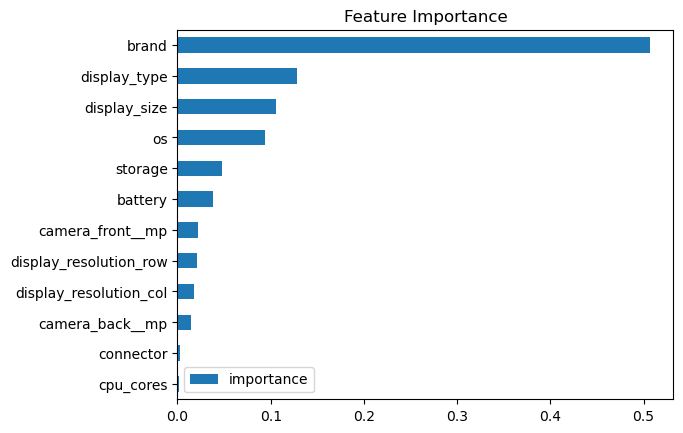

In [872]:
fi = pd.DataFrame(data=feature_importance,
             index=j,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### BaggingRegressor

In [873]:
from sklearn.model_selection import train_test_split
X=phone.drop(columns=['Price'])
y=phone['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [874]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor())
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8596653424952192

## Conclusion:

### All the models suggest that Brand is Major factor in determing the price of mobile phone